In [1]:
import qiskit as qk
import qiskit_aer as qa
from qiskit.primitives import Sampler
from qiskit.circuit.library import PhaseOracle
%matplotlib inline

In [2]:
circuit = qk.QuantumCircuit(1, 1) # Створюємо однокубітну систему з 1 класичним бітом / Creating 1-qbit system with 1 classical bit

In [3]:
"""
Не сталі (Non-constant)  |  Сталі (Constants)
----------------------------------
    func(a) = a          |   func(a) = a & ~a
    func(a) = ~a         |   
"""

non_constant_functions = ["a", "~a"]
constant_functions = ["a & ~a"]

oracle = PhaseOracle(expression=constant_functions[0])  # Створюємо оракула / Creating an oracle

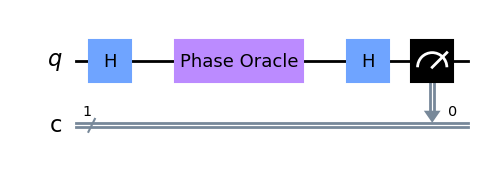

In [4]:
# Застосовуємо вентиль Адамара до першого кубіта / Apllying Hadamard gate to the first qbit
circuit.h(0)

# Застосовуємо оракула до кубіту / Applying oracle to qubit
circuit.append(oracle, [0])

# Застосовуємо вентиль Адамара до першого кубіту / Applying Hadamard gate to the first qubit
circuit.h(0)

# Вимірюємо перший кубіт у перший біт / Measuring the first qubit into first bit
circuit.measure(0, 0)

# Малюємо красиву картинку / Drawing pretty picture
circuit.draw(output="mpl", style="clifford")

In [5]:
# Створюємо бекенд для симуляції / Creating backend for the simulation
simulator = qa.Aer.get_backend('qasm_simulator')

# Створюємо Sampler для локальної симуляції / Creating Sampler to run simulation localy
sampler = Sampler()

# Проводимо симуляцію / Running simulation of the circuit
job = sampler.run(circuits=[circuit])

# Одержуємо результат / Getting result
result = job.result()

# Виводимо відповідь на задачу Дойча / Printing an answer to the Deutsch problem
if 0 in result.quasi_dists[0]:
    print("The function is constant")
else:
    print("The function is non-constant")

# Виводимо діаграму / Plotting histogram
# qk.visualization.plot_distribution(result.quasi_dists[0]) 

The function is constant


# Посилання (Links)
- [qiskit.QuantumCircuit](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit)
- [qiskit.circuit.library.PhaseOracle](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.PhaseOracle)